<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(3_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,31.456873,97.920701,-1183.557234,-1044.179660,176.984955,-1221.164614
1,0.0,1.0,35.780488,23.114531,282.774137,351.669156,-229.504221,581.173378
2,0.0,2.0,62.736089,42.810979,378.650687,494.197755,41.527253,452.670501
3,0.0,3.0,79.200952,41.721532,331.261081,462.183565,131.355824,330.827740
4,0.0,4.0,33.688009,30.650110,-231.308119,-156.970000,-198.229289,41.259289
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,91.675835,28.513648,-363.553805,-233.364322,341.288342,-574.652664
249996,999.0,246.0,37.562145,53.100949,757.892096,858.555190,-79.693604,938.248794
249997,999.0,247.0,28.070917,34.235004,519.315371,591.621291,-70.914217,662.535507
249998,999.0,248.0,68.197292,82.757080,-2264.679444,-2103.725072,3.314003,-2107.039075


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    31.456873  97.920701 -1183.557234 -1044.179660  176.984955   
      1.0    35.780488  23.114531   282.774137   351.669156 -229.504221   
      2.0    62.736089  42.810979   378.650687   494.197755   41.527253   
      3.0    79.200952  41.721532   331.261081   462.183565  131.355824   
      4.0    33.688009  30.650110  -231.308119  -156.970000 -198.229289   
...                ...        ...          ...          ...         ...   
999.0 245.0  91.675835  28.513648  -363.553805  -233.364322  341.288342   
      246.0  37.562145  53.100949   757.892096   858.555190  -79.693604   
      247.0  28.070917  34.235004   519.315371   591.621291  -70.914217   
      248.0  68.197292  82.757080 -2264.679444 -2103.725072    3.314003   
      249.0  90.851020  82.644004  -289.488800  -105.993775  143.265102   

                   e_hat  
rep   index               
0.0   0.0   -1221.164614  
      1.0     581.173378  
      2.0     452.670501  
      3.0     330.827740  
      4.0      41.259289  
...                  ...  
999.0 245.0  -574.652664  
      246.0   938.248794  
      247.0   662.535507  
      248.0 -2107.039075  
      249.0  -249.258878  

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    31.456873  97.920701 -1183.557234 -1044.179660  176.984955   
      1.0    35.780488  23.114531   282.774137   351.669156 -229.504221   
      2.0    62.736089  42.810979   378.650687   494.197755   41.527253   
      3.0    79.200952  41.721532   331.261081   462.183565  131.355824   
      4.0    33.688009  30.650110  -231.308119  -156.970000 -198.229289   
...                ...        ...          ...          ...         ...   
999.0 245.0  91.675835  28.513648  -363.553805  -233.364322  341.288342   
      246.0  37.562145  53.100949   757.892096   858.555190  -79.693604   
      247.0  28.070917  34.235004   519.315371   591.621291  -70.914217   
      248.0  68.197292  82.757080 -2264.679444 -2103.725072    3.314003   
      249.0  90.851020  82.644004  -289.488800  -105.993775  143.265102   

                   e_hat  
rep   index               
0.0   0.0   -1221.164614  
      1.0     581.173378  
      2.0     452.670501  
      3.0     330.827740  
      4.0      41.259289  
...                  ...  
999.0 245.0  -574.652664  
      246.0   938.248794  
      247.0   662.535507  
      248.0 -2107.039075  
      249.0  -249.258878  

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,31.456873,97.920701,-1183.557234,-1044.179660,176.984955,-1221.164614
1,0.0,1.0,35.780488,23.114531,282.774137,351.669156,-229.504221,581.173378
2,0.0,2.0,62.736089,42.810979,378.650687,494.197755,41.527253,452.670501
3,0.0,3.0,79.200952,41.721532,331.261081,462.183565,131.355824,330.827740
4,0.0,4.0,33.688009,30.650110,-231.308119,-156.970000,-198.229289,41.259289
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,91.675835,28.513648,-363.553805,-233.364322,341.288342,-574.652664
249996,999.0,246.0,37.562145,53.100949,757.892096,858.555190,-79.693604,938.248794
249997,999.0,247.0,28.070917,34.235004,519.315371,591.621291,-70.914217,662.535507
249998,999.0,248.0,68.197292,82.757080,-2264.679444,-2103.725072,3.314003,-2107.039075


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    31.456873  97.920701 -1183.557234 -1044.179660  176.984955   
      1.0    35.780488  23.114531   282.774137   351.669156 -229.504221   
      2.0    62.736089  42.810979   378.650687   494.197755   41.527253   
      3.0    79.200952  41.721532   331.261081   462.183565  131.355824   
      4.0    33.688009  30.650110  -231.308119  -156.970000 -198.229289   
...                ...        ...          ...          ...         ...   
999.0 245.0  91.675835  28.513648  -363.553805  -233.364322  341.288342   
      246.0  37.562145  53.100949   757.892096   858.555190  -79.693604   
      247.0  28.070917  34.235004   519.315371   591.621291  -70.914217   
      248.0  68.197292  82.757080 -2264.679444 -2103.725072    3.314003   
      249.0  90.851020  82.644004  -289.488800  -105.993775  143.265102   

                   e_hat  
rep   index               
0.0   0.0   -1221.164614  
      1.0     581.173378  
      2.0     452.670501  
      3.0     330.827740  
      4.0      41.259289  
...                  ...  
999.0 245.0  -574.652664  
      246.0   938.248794  
      247.0   662.535507  
      248.0 -2107.039075  
      249.0  -249.258878  

[250000 rows x 6 columns]

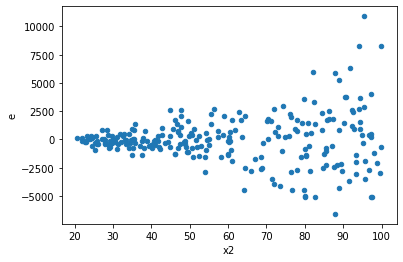

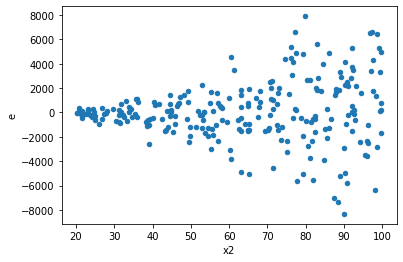

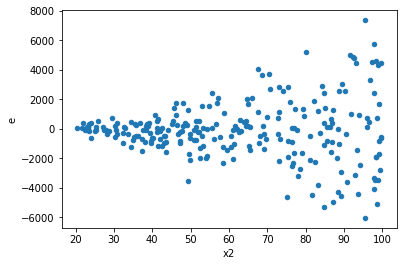

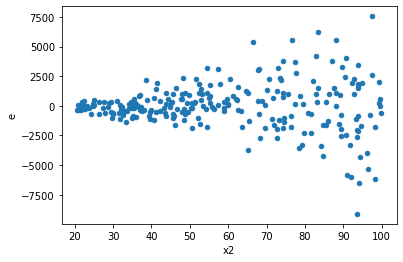

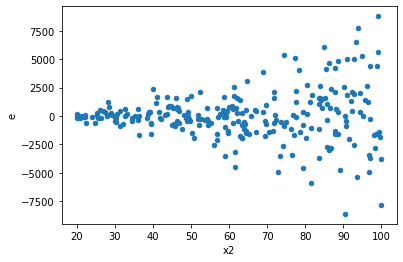

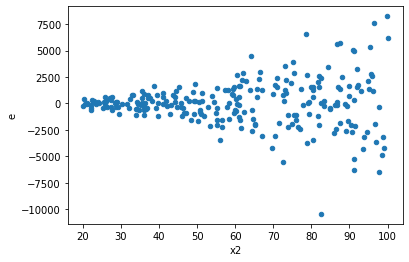

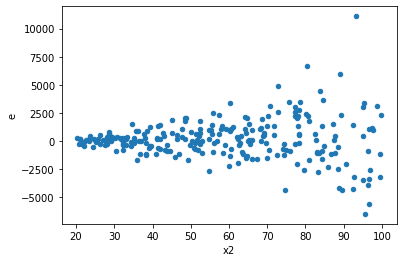

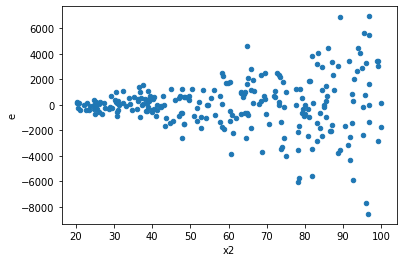

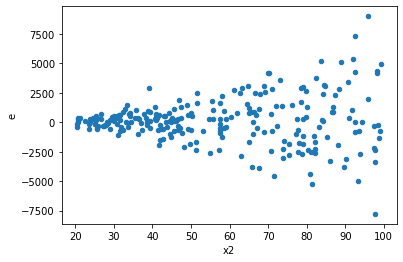

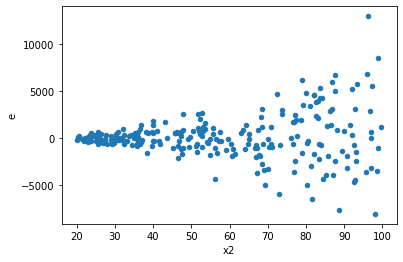

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,137.0,109.0,283685846.5271203,866889523.7692003,2070699.6096870094,7953114.8969651405,3.8407863988380577,2.970734769291994e-12,0.9999999999985146,1.485367384645997e-12,Reject005=0 : Heteroscedasticity
3.0,143.0,103.0,170652327.4673289,797237031.705636,1193372.9193519503,7740165.3563653985,6.485956930016998,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,117.0,129.0,343023093.74745435,815141992.4394486,2931821.3140808064,6318930.173949214,2.155291710173798,2.41313968021295e-05,0.9999879343015989,1.206569840106475e-05,Reject005=0 : Heteroscedasticity
8.0,140.0,106.0,455798696.6065655,473344340.264695,3255704.975761182,4465512.644006557,1.3715962217868105,0.08773219985766989,0.956133900071165,0.043866099928834945,Reject005=1 : Homoscedasticity
13.0,115.0,131.0,179674915.4827885,845864401.5165699,1562390.5694155523,6456980.164248625,4.132756745110158,1.9984014443252818e-14,0.99999999999999,9.992007221626409e-15,Reject005=0 : Heteroscedasticity
15.0,121.0,125.0,108359626.46504763,1083129611.727093,895534.1030169226,8665036.893816743,9.675831288418285,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
16.0,125.0,121.0,335644129.8517811,479265506.0792931,2685153.0388142485,3960871.951068538,1.475101006837823,0.03227257385492566,0.9838637130725372,0.01613628692746283,Reject005=0 : Heteroscedasticity
17.0,134.0,112.0,156301970.57631236,853828928.206819,1166432.616241137,7623472.57327517,6.535716223232879,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
20.0,110.0,136.0,416866366.2351753,646030577.5906982,3789694.238501594,4750224.835225723,1.2534586001597618,0.21013532264620927,0.8949323386768954,0.10506766132310463,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,137.0,109.0,283685846.5271203,866889523.7692003,2070699.6096870094,7953114.8969651405,3.8407863988380577,2.970734769291994e-12,Reject005=0 : Heteroscedasticity
1.0,120.0,126.0,1281017697.4510152,229954838.44030458,10675147.47875846,1825038.4003198775,0.17096142268304595,4.629329402952468e-20,Reject005=0 : Heteroscedasticity
2.0,130.0,116.0,599046209.1555889,344334273.8190886,4608047.762735299,2968398.912233522,0.6441771147075752,0.014948839111606957,Reject005=0 : Heteroscedasticity
3.0,143.0,103.0,170652327.4673289,797237031.705636,1193372.9193519503,7740165.3563653985,6.485956930016998,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,119.0,127.0,790256487.747923,437958871.3463171,6640810.821411118,3448495.0499710008,0.5192882530025489,0.0003454827671161067,Reject005=0 : Heteroscedasticity
5.0,117.0,129.0,343023093.74745435,815141992.4394486,2931821.3140808064,6318930.173949214,2.155291710173798,2.41313968021295e-05,Reject005=0 : Heteroscedasticity
6.0,135.0,111.0,450987688.89294475,350675402.9841956,3340649.547355146,3159237.864722483,0.945695685805687,0.7537710467636773,Reject005=1 : Homoscedasticity
7.0,130.0,116.0,773229955.5407786,262886990.8999165,5947922.734929066,2266267.1629303144,0.3810182586303118,1.2736782523007028e-07,Reject005=0 : Heteroscedasticity
8.0,140.0,106.0,455798696.6065655,473344340.264695,3255704.975761182,4465512.644006557,1.3715962217868105,0.08773219985766989,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    845
Reject005=1 : Homoscedasticity      155
Name: Result_test, dtype: int64